# Deteksi Garis

Panjang buku dalam piksel: 1085 piksel
Lebar buku dalam piksel: 1533 piksel


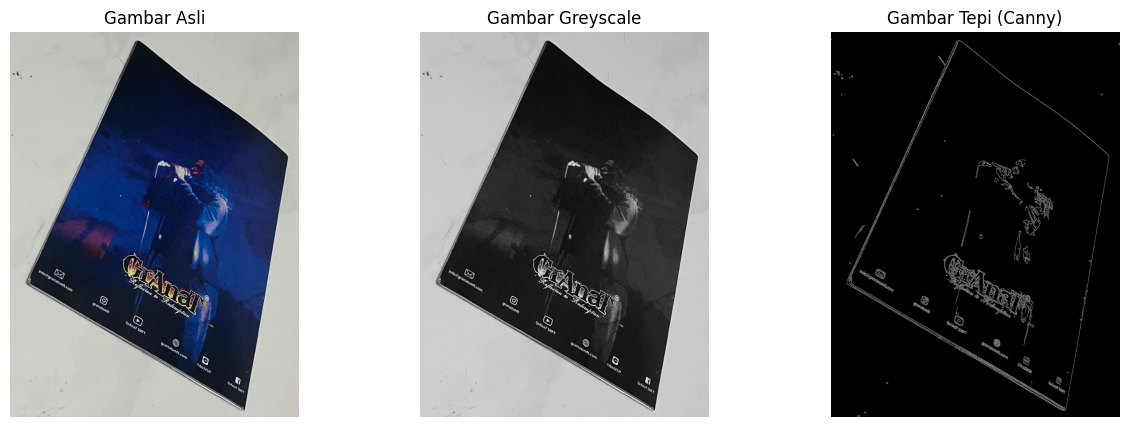

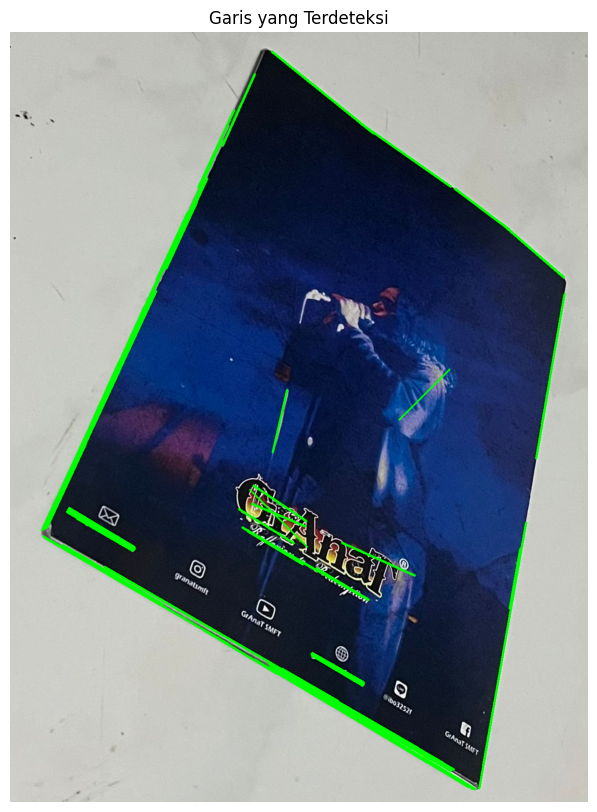

In [ ]:
import cv2  # Mengimpor pustaka OpenCV untuk pemrosesan citra
import numpy as np  # Mengimpor pustaka NumPy untuk operasi array
import matplotlib.pyplot as plt  # Mengimpor Matplotlib untuk menampilkan gambar

# Memuat gambar
image_path = '/content/buku0.jpeg'  # Menentukan path dari gambar yang akan diproses
image = cv2.imread(image_path)  # Membaca gambar dari file dan menyimpannya dalam variabel `image`
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Mengonversi gambar dari BGR ke skala abu-abu (grayscale)

# Deteksi tepi dengan Canny
edges = cv2.Canny(gray, 50, 150, apertureSize=3)  # Canny untuk mendeteksi tepi pada gambar

# Menerapkan Hough Transform Probabilistik untuk mendeteksi garis luar
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)
# Parameter: edges (gambar tepi), resolusi rho (1 piksel), resolusi theta (1 derajat), threshold, panjang garis minimum, dan jarak maksimum antara segmen garis

image_with_lines = image.copy()  # Membuat salinan gambar asli untuk menggambar garis yang terdeteksi

# Inisialisasi variabel untuk menyimpan koordinat batas
x_min, y_min = image.shape[1], image.shape[0]  # Inisialisasi nilai minimum koordinat x dan y
x_max, y_max = 0, 0  # Inisialisasi nilai maksimum koordinat x dan y

# Menggambar garis yang terdeteksi dan menemukan batas terluar
if lines is not None:  # Memastikan ada garis yang terdeteksi
    for line in lines:
        x1, y1, x2, y2 = line[0]  # Mendapatkan koordinat titik awal dan akhir dari setiap garis yang terdeteksi
        cv2.line(image_with_lines, (x1, y1), (x2, y2), (0, 255, 0), 3)  # Menggambar garis pada gambar

        # Menentukan batas luar dari buku berdasarkan garis
        x_min = min(x_min, x1, x2)  # Memperbarui nilai minimum x berdasarkan koordinat garis
        y_min = min(y_min, y1, y2)  # Memperbarui nilai minimum y berdasarkan koordinat garis
        x_max = max(x_max, x1, x2)  # Memperbarui nilai maksimum x berdasarkan koordinat garis
        y_max = max(y_max, y1, y2)  # Memperbarui nilai maksimum y berdasarkan koordinat garis

# Menghitung panjang dan lebar buku dalam piksel
panjang = x_max - x_min  # Menghitung panjang buku sebagai selisih antara x maksimum dan x minimum
lebar = y_max - y_min  # Menghitung lebar buku sebagai selisih antara y maksimum dan y minimum

# Menampilkan hasil
plt.figure(figsize=(15, 5))  # Membuat figure baru dengan ukuran 15x5 inci

# Menampilkan gambar asli
plt.subplot(1, 3, 1)  # Membuat subplot pertama dalam grid 1x3
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Menampilkan gambar asli dalam format RGB
plt.title('Gambar Asli')  # Menambahkan judul pada subplot
plt.axis('off')  # Menyembunyikan sumbu pada subplot

# Menampilkan gambar greyscale
plt.subplot(1, 3, 2)  # Membuat subplot kedua dalam grid 1x3
plt.imshow(gray, cmap='gray')  # Menampilkan gambar greyscale
plt.title('Gambar Greyscale')  # Menambahkan judul pada subplot
plt.axis('off')  # Menyembunyikan sumbu pada subplot

# Menampilkan gambar tepi Canny
plt.subplot(1, 3, 3)  # Membuat subplot ketiga dalam grid 1x3
plt.imshow(edges, cmap='gray')  # Menampilkan gambar tepi yang dihasilkan oleh deteksi Canny
plt.title('Gambar Tepi (Canny)')  # Menambahkan judul pada subplot
plt.axis('off')  # Menyembunyikan sumbu pada subplot

# Menampilkan hasil garis yang terdeteksi
plt.figure(figsize=(10, 10))  # Membuat figure baru dengan ukuran 10x10 inci
plt.imshow(cv2.cvtColor(image_with_lines, cv2.COLOR_BGR2RGB))  # Menampilkan gambar dengan garis yang terdeteksi
plt.title('Garis yang Terdeteksi')  # Menambahkan judul pada gambar
plt.axis('off')  # Menyembunyikan sumbu pada gambar

# Menampilkan panjang dan lebar buku dalam piksel
print(f"Panjang buku dalam piksel: {panjang} piksel")  # Mencetak panjang buku dalam piksel
print(f"Lebar buku dalam piksel: {lebar} piksel")  # Mencetak lebar buku dalam piksel


# Deteksi Lingkaran

Jumlah koin yang terdeteksi: 8


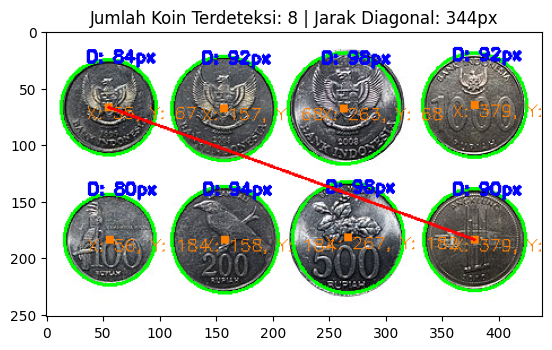

In [ ]:
import cv2  # Mengimpor pustaka OpenCV untuk pemrosesan citra
import matplotlib.pyplot as plt  # Mengimpor Matplotlib untuk menampilkan gambar
import numpy as np  # Mengimpor pustaka NumPy untuk operasi array

# Memuat gambar asli
image_path = '/content/rp.jpeg'  # Menyimpan path gambar yang akan dibaca
image = cv2.imread(image_path)  # Membaca gambar dari path yang diberikan menggunakan OpenCV

# Mengonversi gambar ke grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Mengubah gambar dari BGR menjadi grayscale

# Menerapkan Gaussian Blur
blurred = cv2.GaussianBlur(gray, (11, 11), 0)  # Menghaluskan gambar grayscale menggunakan Gaussian Blur dengan kernel 11x11px

# Deteksi tepi menggunakan Canny
edges = cv2.Canny(blurred, 50, 150)  # Menerapkan deteksi tepi dengan metode Canny pada gambar yang di-blur

# Mendeteksi lingkaran menggunakan Hough Transform
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30,
                           param1=100, param2=30, minRadius=10, maxRadius=50)

# Menampilkan gambar dengan lingkaran yang terdeteksi
output = image.copy()  # Membuat salinan gambar asli untuk menggambar lingkaran yang terdeteksi
count = 0  # Variabel untuk menghitung jumlah lingkaran
distance_px = 0  # Variabel untuk menyimpan jarak antara lingkaran teratas dan terbawah

if circles is not None:  # Memeriksa apakah ada lingkaran yang terdeteksi
    circles = np.round(circles[0, :]).astype("int")  # Membulatkan koordinat dan radius lingkaran ke bilangan bulat
    count = len(circles)  # Menghitung jumlah lingkaran yang terdeteksi
    print(f"Jumlah koin yang terdeteksi: {count}")  # Menampilkan jumlah lingkaran (koin) yang terdeteksi

    # Mengurutkan lingkaran berdasarkan koordinat y untuk menemukan lingkaran teratas dan terbawah
    sorted_circles = sorted(circles, key=lambda x: x[1])
    top_circle = sorted_circles[0]  # Lingkaran paling atas
    bottom_circle = sorted_circles[-1]  # Lingkaran paling bawah

    # Menghitung jarak vertikal antara pusat lingkaran teratas dan terbawah
    distance_px = abs(bottom_circle[1] - top_circle[1])

    # Menggambar lingkaran pada gambar asli dan menambahkan diameter serta koordinat x dan y
    for (x, y, r) in circles:  # Looping untuk setiap lingkaran yang terdeteksi
        cv2.circle(output, (x, y), r, (0, 255, 0), 2)  # Menggambar lingkaran dengan warna hijau pada posisi yang terdeteksi
        cv2.rectangle(output, (x - 3, y - 3), (x + 3, y + 3), (0, 128, 255), -1)  # Menggambar kotak di pusat lingkaran dengan warna oranye
        diameter = 2 * r  # Menghitung diameter koin
        # Menampilkan diameter dan koordinat x, y di atas lingkaran
        cv2.putText(output, f"D: {diameter}px", (x - 20, y - 40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
        # Menambahkan koordinat pusat dengan warna oranye
        cv2.putText(output, f"X: {x}, Y: {y}", (x - 20, y + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 128, 255),1)




# Menentukan koin ujung kiri atas dan kanan bawah berdasarkan koordinat x dan y
top_left_circle = min(circles, key=lambda x: (x[0] + x[1]))  # Koin ujung kiri atas
bottom_right_circle = max(circles, key=lambda x: (x[0] + x[1]))  # Koin ujung kanan bawah

# Menghitung jarak diagonal antara pusat kedua koin
diagonal_distance_px = int(np.sqrt((bottom_right_circle[0] - top_left_circle[0])**2
                                   +
                                   (bottom_right_circle[1] - top_left_circle[1])**2))

# Menggambar garis antara kedua koin
cv2.line(output, (top_left_circle[0], top_left_circle[1]), (bottom_right_circle[0], bottom_right_circle[1]), (0, 0, 255), 2)

# Menampilkan gambar dengan garis yang ditambahkan
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))  # Mengonversi warna BGR ke RGB untuk tampilan di Matplotlib
plt.title(f"Jumlah Koin Terdeteksi: {count} | Jarak Diagonal: {diagonal_distance_px}px")  # Judul gambar
plt.show()  # Menampilkan gambar


In [9]:
!git config --global user.name "gusmahen"
!git config --global user.email "suryamahendra@student.unud.ac.id"

!git remote add origin git@github.com:gusmahen/houghtransform-visikomputer-.git
!git branch -M main
!git push -u origin main

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
